### Load Library

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

### Load in Test and Validation Data

y_test and y_val labels have to be converted to integer for roc computation
x_test and x_val needs to have certain columns dropped

In [8]:
## Load in Test Set
X_test_path = "/Users/claudia/DSA4262-ACMXZ/data/preprocessed_data/X_test_enc.parquet"
X_test = pd.read_parquet(X_test_path)

y_test_path = "/Users/claudia/DSA4262-ACMXZ/data/preprocessed_data/y_test.parquet"
y_test = pd.read_parquet(y_test_path)
y_test = pd.DataFrame(y_test['label'].astype(int)) ## convert labels to int for roc and auc calculation

## Load in Validation Set
X_val_path = "/Users/claudia/DSA4262-ACMXZ/data/preprocessed_data/X_val_enc.parquet"
X_val = pd.read_parquet(X_val_path)

y_val_path = "/Users/claudia/DSA4262-ACMXZ/data/preprocessed_data/y_val.parquet"
y_val = pd.read_parquet(y_val_path)
y_val = pd.DataFrame(y_val['label'].astype(int))

In [9]:
## need to drop columns for X validation and test data

X_val_25 = X_val.drop(['dwelling_time_50', 'dwelling_time_75', 'dwelling_time_mean', 'std_50', 'std_75', 'std_mean', 'mean_50', 'mean_75', 'mean_mean'], axis = 1)
X_val_50 = X_val.drop(['dwelling_time_25', 'dwelling_time_75', 'dwelling_time_mean', 'std_25', 'std_75', 'std_mean', 'mean_25', 'mean_75', 'mean_mean'], axis = 1)
X_val_75 = X_val.drop(['dwelling_time_25', 'dwelling_time_50', 'dwelling_time_mean', 'std_25', 'std_50', 'std_mean', 'mean_25', 'mean_50', 'mean_mean'], axis = 1)
X_val_mean = X_val.drop(['dwelling_time_25', 'dwelling_time_50', 'dwelling_time_75', 'std_25', 'std_50', 'std_75', 'mean_25', 'mean_50', 'mean_75'], axis = 1)

X_test_25 = X_test.drop(['dwelling_time_50', 'dwelling_time_75', 'dwelling_time_mean', 'std_50', 'std_75', 'std_mean', 'mean_50', 'mean_75', 'mean_mean'], axis = 1)
X_test_50 = X_test.drop(['dwelling_time_25', 'dwelling_time_75', 'dwelling_time_mean', 'std_25', 'std_75', 'std_mean', 'mean_25', 'mean_75', 'mean_mean'], axis = 1)
X_test_75 = X_test.drop(['dwelling_time_25', 'dwelling_time_50', 'dwelling_time_mean', 'std_25', 'std_50', 'std_mean', 'mean_25', 'mean_50', 'mean_mean'], axis = 1)
X_test_mean = X_test.drop(['dwelling_time_25', 'dwelling_time_50', 'dwelling_time_75', 'std_25', 'std_50', 'std_75', 'mean_25', 'mean_50', 'mean_75'], axis = 1)

### Create Function for Basic Random Forest Classification

link to understand RandomForestClassifier different parameters

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [4]:
def random_forest(x_train, y_train, x_val, y_val, x_test, y_test, variable):
    ## create classifier
    clf = RandomForestClassifier()

    ## train the model
    clf.fit(x_train, y_train)

    ## get validation and test predicition
    y_val_pred = clf.predict(x_val)
    print('Accuracy of random forest classifier on validation set using {}: {:.2f}'.format(variable, metrics.accuracy_score(y_val, y_val_pred)))
   
    y_test_pred = clf.predict(x_test)
    print('Accuracy of random forest classifier on test set using {}: {:.2f}'.format(variable, metrics.accuracy_score(y_test, y_test_pred)))

    ## print roc auc curve
    rf_roc_auc = roc_auc_score(y_test, y_test_pred)
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label = 'Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = "lower right")
    plt.savefig('Log_ROC')
    plt.show()

# Modelling on 25th Quantile

In [15]:
## Load Datasets
X_train_25_path = "/Users/claudia/DSA4262-ACMXZ/data/preprocessed_data/X_train_25.parquet" ## to edit file path
X_train_25 = pd.read_parquet(X_train_25_path)

y_train_path = "/Users/claudia/DSA4262-ACMXZ/data/preprocessed_data/y_train.parquet"
y_train = pd.read_parquet(y_train_path)
y_train = pd.DataFrame(y_train['label'].astype(int))

In [16]:
print(f"Number of Rows for X_train_25 and y_train: {len(X_train_25)}, {len(y_train)}")
print(f"Number of Rows for X_test_25 and y_test: {len(X_test_25)}, {len(y_test)}")
print(f"Number of Rows for X_val_25 and y_val: {len(X_val_25)}, {len(y_val)}")

Number of Rows for X_train_25 and y_train: 51567, 51567
Number of Rows for X_test_25 and y_test: 16275, 16275
Number of Rows for X_val_25 and y_val: 17434, 17434


<ipython-input-4-a41e7b7a046d>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


Accuracy of random forest classifier on validation set using 25th quantile: 0.93
Accuracy of random forest classifier on test set using 25th quantile: 0.94


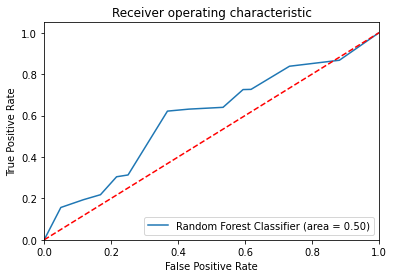

In [17]:
random_forest(X_train_25, y_train, X_val_25, y_val, X_test_25, y_test, "25th quantile")

# Modelling on 50th Quantile

In [18]:
## Load Datasets
X_train_50_path = "/Users/claudia/DSA4262-ACMXZ/data/preprocessed_data/X_train_50.parquet" ## to edit file path
X_train_50 = pd.read_parquet(X_train_50_path)

<ipython-input-4-a41e7b7a046d>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


Accuracy of random forest classifier on validation set using 50th quantile: 0.89
Accuracy of random forest classifier on test set using 50th quantile: 0.90


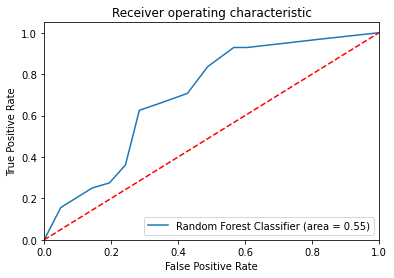

In [19]:
random_forest(X_train_50, y_train, X_val_50, y_val, X_test_50, y_test, "50th quantile")

# Modelling on 75th Quantile

In [20]:
## Load Datasets
X_train_75_path = "/Users/claudia/DSA4262-ACMXZ/data/preprocessed_data/X_train_75.parquet" ## to edit file path
X_train_75 = pd.read_parquet(X_train_75_path)

<ipython-input-4-a41e7b7a046d>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


Accuracy of random forest classifier on validation set using 75th quantile: 0.89
Accuracy of random forest classifier on test set using 75th quantile: 0.90


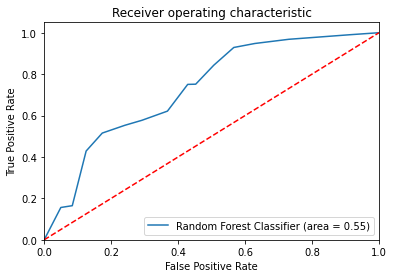

In [21]:
random_forest(X_train_75, y_train, X_val_75, y_val, X_test_75, y_test, "75th quantile")

# Modelling on Mean

In [22]:
## Load Datasets
X_train_mean_path = "/Users/claudia/DSA4262-ACMXZ/data/preprocessed_data/X_train_mean.parquet" ## to edit file path
X_train_mean = pd.read_parquet(X_train_mean_path)

<ipython-input-4-a41e7b7a046d>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


Accuracy of random forest classifier on validation set using mean: 0.93
Accuracy of random forest classifier on test set using mean: 0.94


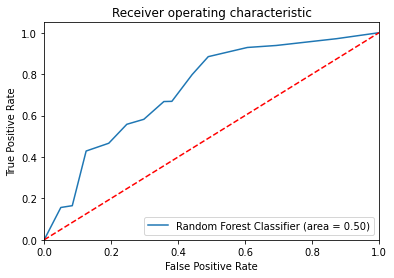

In [23]:
random_forest(X_train_mean, y_train, X_val_mean, y_val, X_test_mean, y_test, "mean")